In [ ]:
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
plant1 = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/plant1_merged.csv")
plant2 = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/plant2_merged.csv")

In [ ]:
datasets = {
    "Plant 1:":plant1,
    "Plant 2:":plant2
}

In [ ]:
for name,df in datasets.items():
  print(f"\n{name}")
  display(df.head(2))
  display(df.dtypes)
  display(df.isnull().sum())


Plant 1:


,DATE_TIME,MONTH,DAY,HOUR,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,5,15,0,4135001,1BY6WEcLGh8j5v7,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,5,15,0,4135001,1IF53ai7Xc0U56Y,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0


,0
DATE_TIME,object
MONTH,int64
DAY,int64
HOUR,int64
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64


,0
DATE_TIME,0
MONTH,0
DAY,0
HOUR,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0



Plant 2:


,DATE_TIME,MONTH,DAY,HOUR,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,5,15,0,4136001,4UPUqMRk7TRMgml,27.004764,25.060789,0.0,0.0,0.0,9425.0,2.429011e+06
1,2020-05-15 00:00:00,5,15,0,4136001,81aHJ1q11NBPMrL,27.004764,25.060789,0.0,0.0,0.0,0.0,1.215279e+09


,0
DATE_TIME,object
MONTH,int64
DAY,int64
HOUR,int64
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64


,0
DATE_TIME,0
MONTH,0
DAY,0
HOUR,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0


In [ ]:
#convert data type of date time column
for name,df in datasets.items():
  print(f"\n{name}")
  df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], errors='coerce')
  if df['DATE_TIME'].dtypes == 'object':
    print("Data Type Not Converted")
  else:
    print("Data Type Converted from object to date_time")


Plant 1:
Data Type Converted from object to date_time

Plant 2:
Data Type Converted from object to date_time


In [ ]:
#check if there are any naT values in date time column
for name,df in datasets.items():
  if df['DATE_TIME'].isna().sum() > 0:
    print(f"{name} ""Invalid Date Values")
  else:
    print(f"{name} ""No Invalid Data Values")

Plant 1: No Invalid Data Values
Plant 2: No Invalid Data Values


In [ ]:
#creating date time column and daily yield column in MWh
# I will also be going ahead and creating a new dataframe for this as I will be requiring to use it further in my Time series forecasting

daily_df = {}

for name,df in datasets.items():
  daily_yield = (df.groupby(df['DATE_TIME'].dt.date)['DAILY_YIELD'].sum().reset_index().rename(columns={'DATE_TIME':'DATE', 'DAILY_YIELD':'DAILY_YIELD_MWh'}))
  daily_yield['DAILY_YIELD_MWh'] = round((daily_yield['DAILY_YIELD_MWh'] / 1e6),2)
  daily_yield = daily_yield.set_index('DATE')
  print(f"\n{name}")
  display(daily_yield.head())
  print("Shae of Data:",daily_yield.shape)

  daily_df[name] = daily_yield


Plant 1:


,DAILY_YIELD_MWh
DATE,
2020-05-15,5.05
2020-05-16,6.70
2020-05-17,7.80
2020-05-18,5.13
2020-05-19,5.90


Shae of Data: (34, 1)

Plant 2:


,DAILY_YIELD_MWh
DATE,
2020-05-15,8.00
2020-05-16,7.23
2020-05-17,6.71
2020-05-18,6.26
2020-05-19,5.18


Shae of Data: (34, 1)


Figure(640x480)
Figure(640x480)


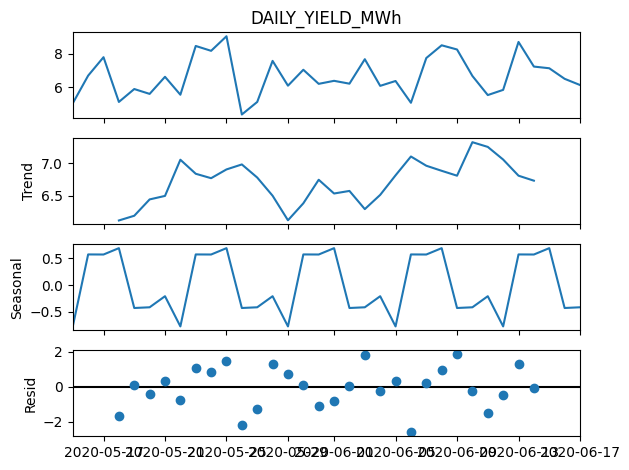

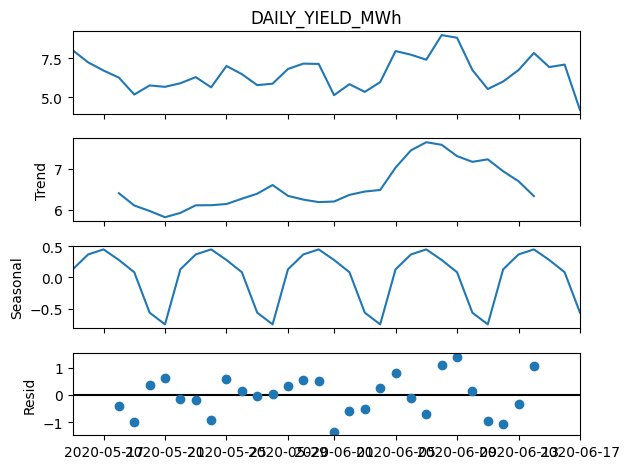

In [ ]:
# seasonal_decompose(data) takes your time series data as input and decomposes it into three main components:

# Trend: The overall direction or pattern in the data over a long period.
# Seasonality: The repeating short-term cycle in the data (e.g., monthly or quarterly patterns).
# Residual (Noise): The random variation or noise left after removing the trend and seasonality.

#library to check the seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

for name, df in daily_df.items():
  daily_yield_SD = df['DAILY_YIELD_MWh']
  daily_yield_SD = daily_yield_SD.asfreq('D')
  decomposed=seasonal_decompose(daily_yield_SD)
  print(decomposed.plot())

In [ ]:
#check if the data is stationary or not and if it is not stationary then we need to apply transformations
#library for augmented dickey fuller test (ADF Test)
from statsmodels.tsa.stattools import adfuller

for name, df in daily_df.items():
  p_val = adfuller(df)
  p_value = p_val[1]
  print(f"For {name} Stationary Check - The P Value is {p_value:4f}")

  if p_value <=0.05:
    print(f"For {name} the P values is {p_value:.4f} <= 0.05, thus the data is stationary.")
  else:
    print(f"For {name} the P values is {p_value:.4f} >= 0.05, thus the data is not stationary.")



For Plant 1: Stationary Check - The P Value is 0.000068
For Plant 1: the P values is 0.0001 <= 0.05, thus the data is stationary.
For Plant 2: Stationary Check - The P Value is 0.038912
For Plant 2: the P values is 0.0389 <= 0.05, thus the data is stationary.


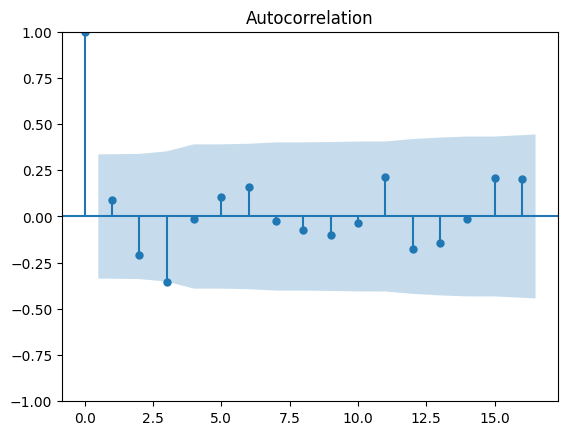

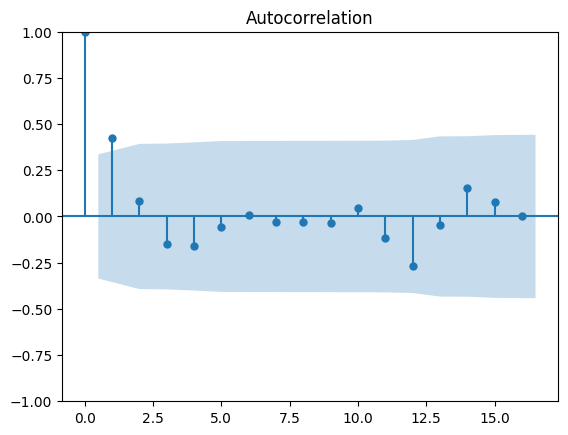

In [ ]:
#check ACF plot
from statsmodels.graphics.tsaplots import plot_acf

for name,df in daily_df.items():
  plot_acf(df)

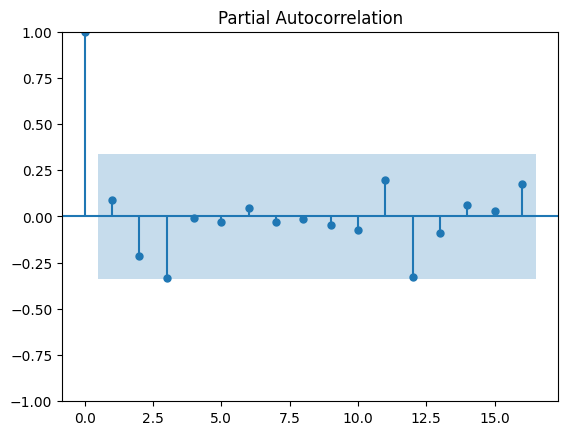

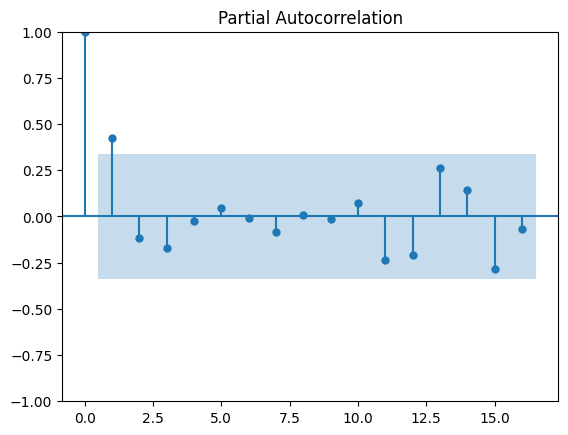

In [ ]:
#PACF
from statsmodels.graphics.tsaplots import plot_pacf

for name,df in daily_df.items():
  plot_pacf(df)


In [ ]:
#split the data in train and test
for name, df in daily_df.items():
    train = df.iloc[:-7]
    test = df.iloc[-7:]
    print(f"{name}: Train shape = {train.shape}, Test shape = {test.shape}")

Plant 1:: Train shape = (27, 1), Test shape = (7, 1)
Plant 2:: Train shape = (27, 1), Test shape = (7, 1)


=========== ARIMA MODEL RESULTS ===========


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Plant 1:
MAE: 1.069, RMSE: 1.400, MAPE: 14.99%


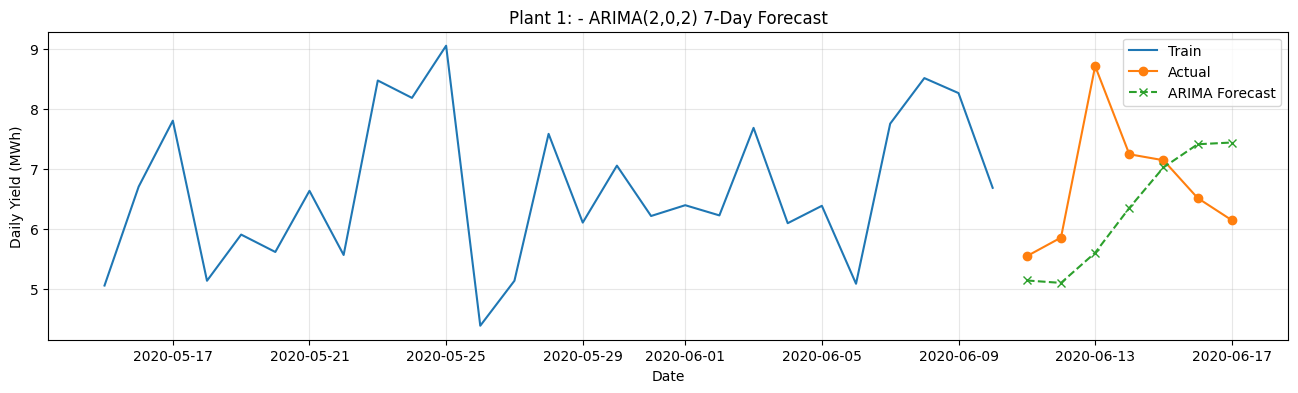

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Plant 2:
MAE: 1.380, RMSE: 1.538, MAPE: 22.36%


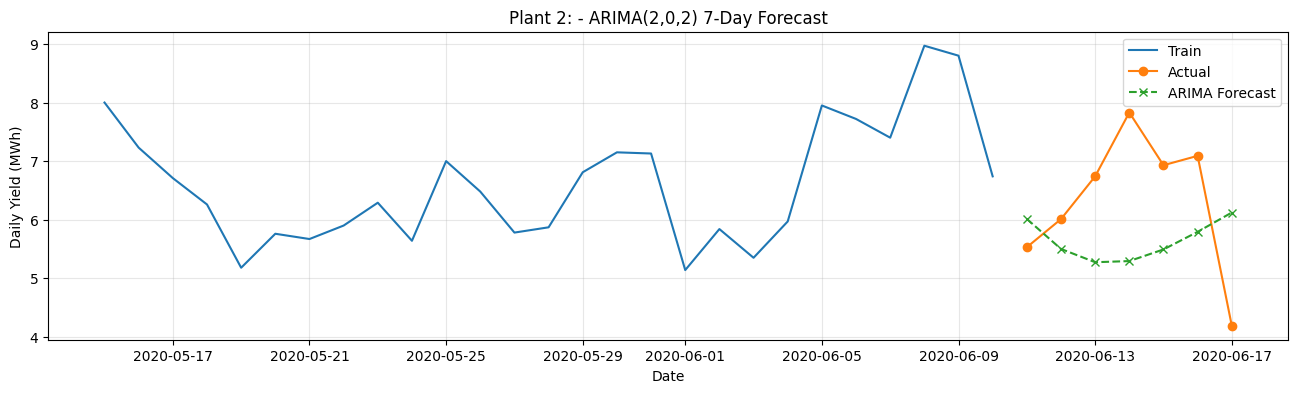

In [ ]:
# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- ARIMA Forecasting ---
from statsmodels.tsa.arima.model import ARIMA

print("=========== ARIMA MODEL RESULTS ===========")

for name, df in daily_df.items():
    train = df.iloc[:-7]
    test = df.iloc[-7:]

    model = ARIMA(train['DAILY_YIELD_MWh'], order=(2,0,2))
    fit = model.fit()

    forecast = fit.forecast(steps=7)

    # --- Metrics ---
    mae = mean_absolute_error(test['DAILY_YIELD_MWh'], forecast)
    rmse = np.sqrt(mean_squared_error(test['DAILY_YIELD_MWh'], forecast))
    mape = np.mean(np.abs((test['DAILY_YIELD_MWh'] - forecast) / test['DAILY_YIELD_MWh'])) * 100

    print(f"\n{name}")
    print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.2f}%")

    # --- Plot ---
    plt.figure(figsize=(16,4))
    plt.plot(train.index, train['DAILY_YIELD_MWh'], label='Train')
    plt.plot(test.index, test['DAILY_YIELD_MWh'], label='Actual', marker='o')
    plt.plot(test.index, forecast, label='ARIMA Forecast', marker='x', linestyle='--')
    plt.title(f"{name} - ARIMA(2,0,2) 7-Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Daily Yield (MWh)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


=========== SARIMA MODEL RESULTS ===========


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Plant 1:
MAE: 1.702, RMSE: 1.916, MAPE: 24.93%


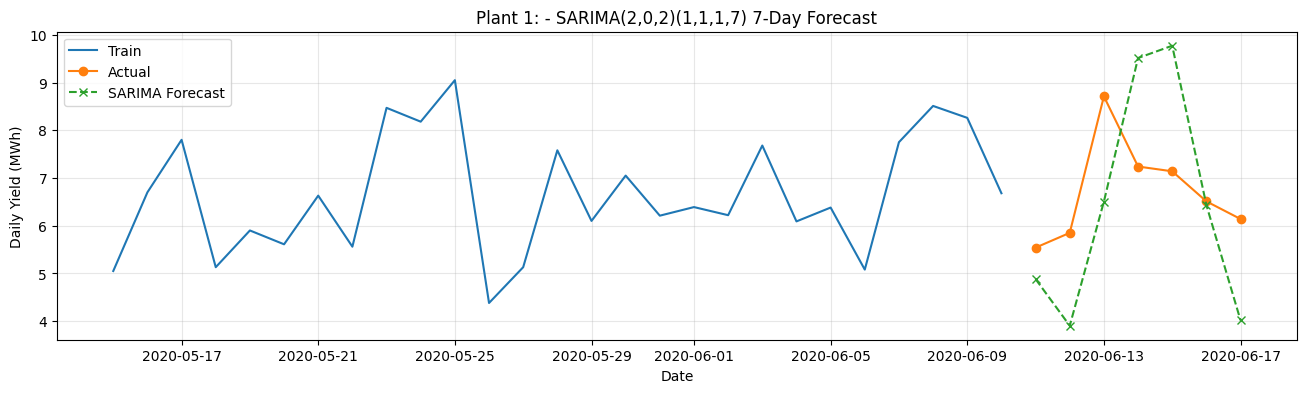

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Plant 2:
MAE: 1.385, RMSE: 1.522, MAPE: 24.48%


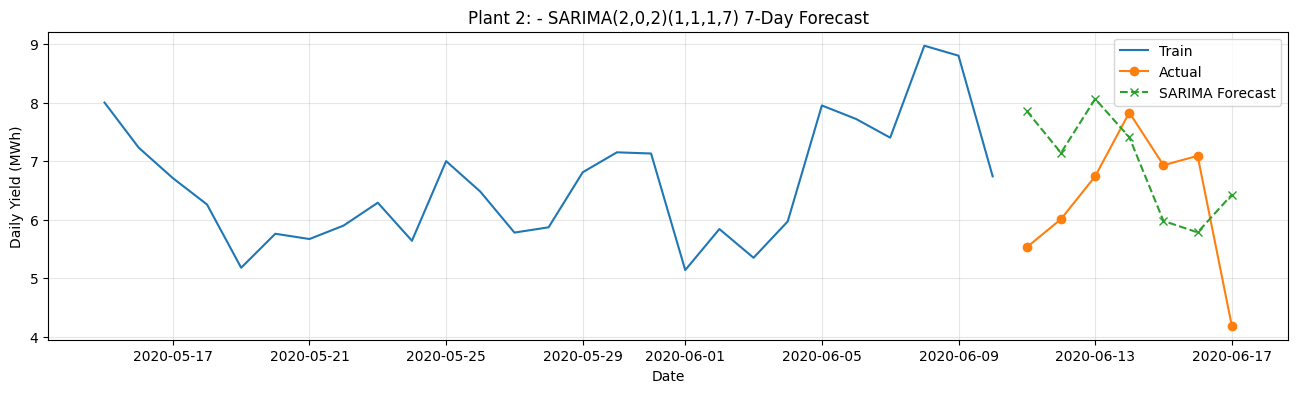

In [ ]:
# --- SARIMA Forecasting ---
from statsmodels.tsa.statespace.sarimax import SARIMAX

print("=========== SARIMA MODEL RESULTS ===========")

for name, df in daily_df.items():
    train = df.iloc[:-7]
    test = df.iloc[-7:]

    model = SARIMAX(train['DAILY_YIELD_MWh'],
                    order=(2,0,2),
                    seasonal_order=(1,1,1,7),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    fit = model.fit()

    forecast = fit.forecast(steps=7)

    # --- Metrics ---
    mae = mean_absolute_error(test['DAILY_YIELD_MWh'], forecast)
    rmse = np.sqrt(mean_squared_error(test['DAILY_YIELD_MWh'], forecast))
    mape = np.mean(np.abs((test['DAILY_YIELD_MWh'] - forecast) / test['DAILY_YIELD_MWh'])) * 100

    print(f"\n{name}")
    print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.2f}%")

    # --- Plot ---
    plt.figure(figsize=(16,4))
    plt.plot(train.index, train['DAILY_YIELD_MWh'], label='Train')
    plt.plot(test.index, test['DAILY_YIELD_MWh'], label='Actual', marker='o')
    plt.plot(test.index, forecast, label='SARIMA Forecast', marker='x', linestyle='--')
    plt.title(f"{name} - SARIMA(2,0,2)(1,1,1,7) 7-Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Daily Yield (MWh)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
